In [1]:
import pandas as pd
from libmlops.data.data_loading import explore_dataset

data = []
# Create lists for x, y, and z
for w in range(13):
    for x in range(130):
        for y in range(130):
            data.append([w, x / 10, y / 10, w + (x / 10) * (y / 10)])

# Create a DataFrame from the dictionary
dataset = pd.DataFrame(data, columns=["w", "x", "y", "z"])
# explore_dataset(dataset, show_ui=True)
dataset

,w,x,y,z
0,0,0.0,0.0,0.00
1,0,0.0,0.1,0.00
2,0,0.0,0.2,0.00
3,0,0.0,0.3,0.00
4,0,0.0,0.4,0.00
...,...,...,...,...
219695,12,12.9,12.5,173.25
219696,12,12.9,12.6,174.54
219697,12,12.9,12.7,175.83
219698,12,12.9,12.8,177.12


In [2]:
from libmlops.data.data_preprocessing import get_xy
from libmlops.features.feature_selection import convert_indices
from libmlops.utils.regressor_evaluation import features_evaluation
from libmlops.utils.features_evaluation import keep_features

X, Y = get_xy(dataset)
features = features_evaluation(X, Y, verbose=True)
features = convert_indices(dataset, features)
print(features)
dataset_reduced = keep_features(dataset, features)

dataset_reduced.head()

LINR [1, 2] [0.        1.        0.7376827]
RDG [1] [0.         1.         0.39656257]
LSO [1, 2] [0.         0.77602411 1.        ]
ELN [1, 2] [0.         1.         0.63990803]
DTR [1, 2] [0.         1.         0.76241079]
RFR [1, 2] [0.        0.6324694 1.       ]


c:\Users\root\AppData\Local\pypoetry\Cache\virtualenvs\mlops-template-S-gadGQo-py3.11\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVR [1, 2] [0.         0.78878316 1.        ]
KNR [1, 2] [0.         0.97494569 1.        ]
GBR [1, 2] [0.         1.         0.87492171]
[1, 2]
['x', 'y']


,x,y
0,0.0,0.0
1,0.0,0.1
2,0.0,0.2
3,0.0,0.3
4,0.0,0.4


In [3]:
from numpy import set_printoptions
from libmlops.features.feature_evaluation import (
    get_feature_importance,
    get_k_best_features,
    get_recursive_feature_elimination,
    get_linear_regression,
    get_decision_tree,
)

set_printoptions(precision=2)
# print("get_feature_importance", get_feature_importance(X, Y, verbose=False))
print("get_k_best_features", get_k_best_features(X, Y, verbose=False))
# print(
#     "get_recursive_feature_elimination",
#     get_recursive_feature_elimination(X, Y, verbose=False),
# )
print("get_linear_regression", get_linear_regression(X, Y, verbose=False))
print("get_decision_tree", get_decision_tree(X, Y, verbose=False))

get_k_best_features [0. 1. 1.]
get_linear_regression [0. 1. 1.]
get_decision_tree [0.   1.   0.81]


LINR: 0.856688 (0.001495)
RDG: 0.856688 (0.001495)
LSO: 0.856534 (0.001418)
ELN: 0.855313 (0.001227)
DTR: 0.999774 (0.000001)
RFR: 0.999979 (0.000001)
SVR: 0.856642 (0.001468)
KNR: 0.999951 (0.000001)
GBR: 0.998811 (0.000056)


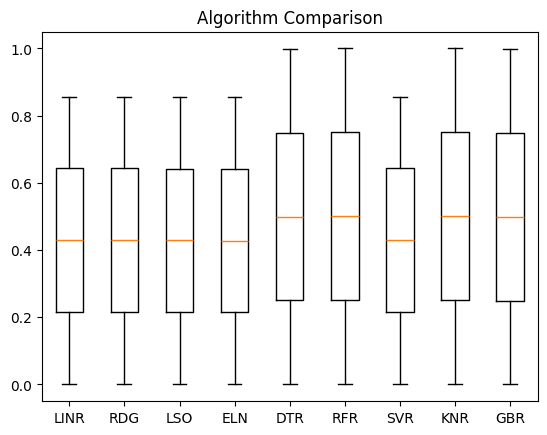

In [4]:
from libmlops.utils.regressor_evaluation import (
    algorithm_evaluation,
    compare_algorithms,
)

# X = dataset_reduced
Y = dataset[["z"]]
results, names = algorithm_evaluation(X, Y, verbose=True)
compare_algorithms(results, names)

In [5]:
from libmlops.data.data_loading import save_datasets
from libmlops.data.data_preprocessing import split_train_test_xy


X_train, X_validation, Y_train, Y_validation = split_train_test_xy(X, Y, random_state=1)
save_datasets(
    [X_train, X_validation, Y_train, Y_validation],
    ["X_train", "X_validation", "Y_train", "Y_validation"],
    save_path="../data/processed",
)

In [6]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from libmlops.data.data_loading import load_datasets
from libmlops.models.model_loading import load_models, save_models
from libmlops.models.model_training import train_model


LOAD_MODEL = False
print("Loading training datasets")
[X_train, Y_train] = load_datasets(
    ["X_train", "Y_train"], save_path="../data/processed/"
)
model = []
model_name = "finalised_model"
if LOAD_MODEL:
    print("Loading previous model")
    [model] = load_models(model_name, save_path="../data/processed/")


if model == []:
    print("Does not exist - creating new model")
    # model = RandomForestRegressor(n_jobs=-1)
    # model = GradientBoostingRegressor()
    model = DecisionTreeRegressor()
    # model = KNeighborsRegressor(n_jobs=-1)
    print("Saving model")
    save_models(model, model_name, save_path="../data/processed/")


print("Training model")
train_model(model, X_train, Y_train.values.ravel())
print("Saving model")
save_models(model, model_name, save_path="../data/processed/")

Loading training datasets
Does not exist - creating new model
Saving model
Training model
Saving model


In [7]:
from libmlops.data.data_loading import load_datasets
from libmlops.models.model_loading import load_models
from libmlops.utils.regressor_evaluation import model_evaluation

print("Loading validation datasets")
[X_validation, Y_validation] = load_datasets(
    ["X_validation", "Y_validation"], save_path="../data/processed/"
)

print("Loading previous model")
model_name = "finalised_model"
[model] = load_models(model_name, save_path="../data/processed/")

print("Evaluating model")
r2, mae, cv_results_mean, cv_results_std = model_evaluation(
    model, X_validation, Y_validation
)
print("R-squared (coefficient of determination) regression score: ", r2)
print("Mean Absolute Error:", mae)
print("Cross-validation: %f Mean (%f Standard)" % (cv_results_mean, cv_results_std))

Loading validation datasets
Loading previous model
Evaluating model
R-squared (coefficient of determination) regression score:  0.99974435427538
Mean Absolute Error: 0.48227401001365494
Cross-validation: 0.999011 Mean (0.000022 Standard)


In [8]:
import pandas as pd

print("Loading previous model")
model_name = "finalised_model"
[model] = load_models(model_name, save_path="../data/processed/")

names = [
    "w",
    "x",
    "y",
]
data = [[10, 1, 1], [10, 2, 2], [10, 4, 4], [10, 8, 8], [10, 12, 12]]

df = pd.DataFrame(data, columns=names)

df

Loading previous model


,w,x,y
0,10,1,1
1,10,2,2
2,10,4,4
3,10,8,8
4,10,12,12


In [9]:
df_new = df
# if features != []:
#     df_new = keep_features(df, features)
#     print(features, df_new.columns)

# df_new

In [10]:
for index, row in df_new.iterrows():
    # test the model with 1 row
    print(
        index, row.values, model.predict(pd.DataFrame([row.values], columns=row.index))
    )

0 [10  1  1] [11.]
1 [10  2  2] [14.]
2 [10  4  4] [25.6]
3 [10  8  8] [74.]
4 [10 12 12] [154.]
